KeyboardInterrupt: 

In [2]:
import spacy
import pandas as pd

# Install and load the SpaCy model if needed:
# !pip install spacy
# !python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

# Sample dataframe with a 'text' column
df = pd.DataFrame({
    "text": [
        "Barack Obama was the 44th President of the United States.",
        "Apple Inc. is headquartered in Cupertino, California."
    ]
})

# Build a list of (original_text, entity, label) rows
records = []
for doc_text in df["text"]:
    doc = nlp(doc_text)
    for ent in doc.ents:
        records.append((doc_text, ent.text, ent.label_))

# Create a DataFrame for the NER knowledge graph
ner_graph_df = pd.DataFrame(records, columns=["original_text", "entity", "label"])

print(ner_graph_df)

                                       original_text             entity  \
0  Barack Obama was the 44th President of the Uni...       Barack Obama   
1  Barack Obama was the 44th President of the Uni...               44th   
2  Barack Obama was the 44th President of the Uni...  the United States   
3  Apple Inc. is headquartered in Cupertino, Cali...         Apple Inc.   
4  Apple Inc. is headquartered in Cupertino, Cali...          Cupertino   
5  Apple Inc. is headquartered in Cupertino, Cali...         California   

     label  
0   PERSON  
1  ORDINAL  
2      GPE  
3      ORG  
4      GPE  
5      GPE  


c:\Users\USER\anaconda3\envs\genesis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 34311 (\N{CJK UNIFIED IDEOGRAPH-8607}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\genesis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23039 (\N{CJK UNIFIED IDEOGRAPH-59FF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\genesis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20016 (\N{CJK UNIFIED IDEOGRAPH-4E30}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


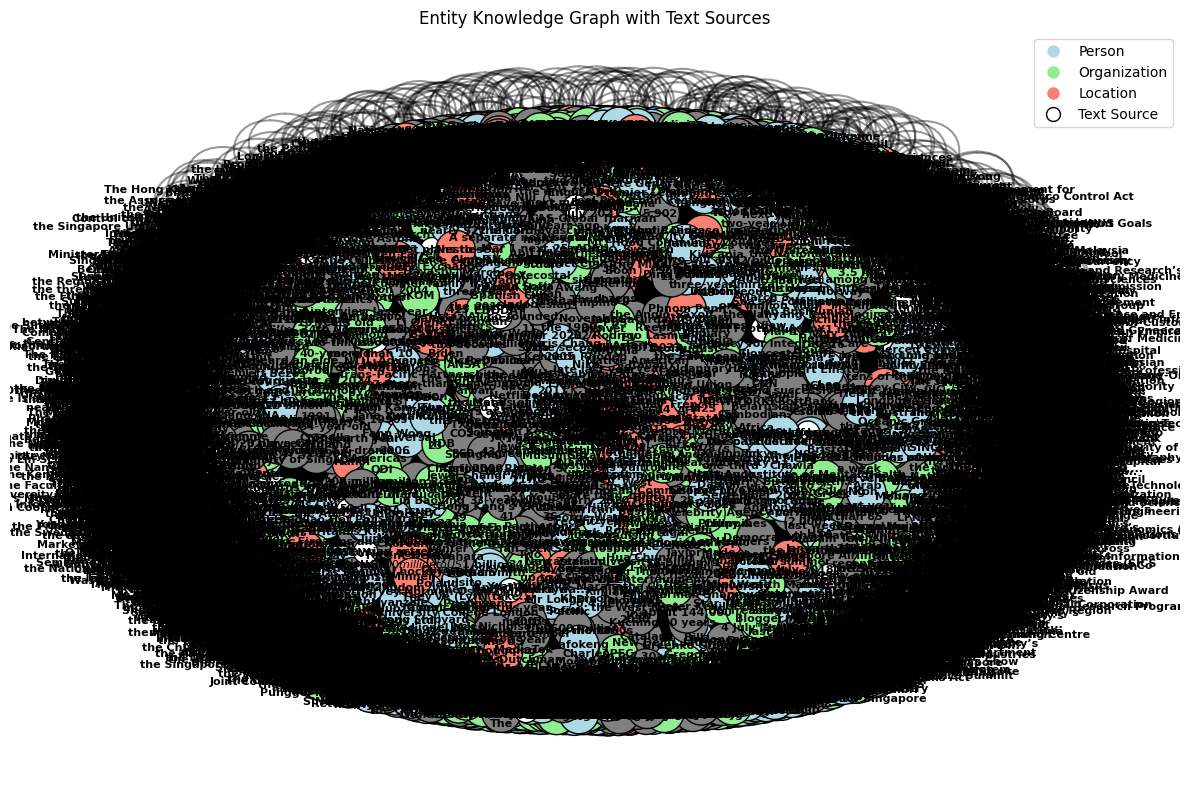

In [8]:
import spacy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Create sample data
df = pd.read_excel('news_excerpts_parsed.xlsx')
# Extract entities and create NER dataframe
records = []
for doc_text in df["Text"]:
    doc = nlp(doc_text)
    for ent in doc.ents:
        records.append((doc_text, ent.text, ent.label_))

ner_graph_df = pd.DataFrame(records, columns=["original_text", "entity", "label"])

# Create knowledge graph
G = nx.Graph()

# Add nodes and relationships
for text, group in ner_graph_df.groupby('original_text'):
    # Shorten text for display
    truncated_text = text[:20] + "..." if len(text) > 20 else text
    
    # Add text node
    G.add_node(truncated_text, type='text', size=50)
    
    # Add entities and connections
    entities = []
    for _, row in group.iterrows():
        entity = row['entity']
        label = row['label']
        G.add_node(entity, type='entity', label=label)
        G.add_edge(entity, truncated_text)
        entities.append(entity)
    
    # Connect entities within the same text
    for ent1, ent2 in combinations(entities, 2):
        G.add_edge(ent1, ent2)

# Set up visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.7)

# Get node colors and sizes
node_colors = []
node_sizes = []
for node in G.nodes:
    if G.nodes[node]['type'] == 'entity':
        label = G.nodes[node]['label']
        # Assign color based on entity label
        if label == 'PERSON': node_colors.append('lightblue')
        elif label == 'ORG': node_colors.append('lightgreen')
        elif label == 'GPE': node_colors.append('salmon')
        else: node_colors.append('gray')
        node_sizes.append(800)
    else:
        node_colors.append('white')
        node_sizes.append(300)

# Draw the graph
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=node_sizes,
    edgecolors='black'
)
nx.draw_networkx_edges(
    G, pos,
    alpha=0.4,
    width=1.5
)
nx.draw_networkx_labels(
    G, pos,
    font_size=8,
    font_weight='bold'
)

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Person', 
               markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Organization', 
               markerfacecolor='lightgreen', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Location', 
               markerfacecolor='salmon', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Text Source', 
               markerfacecolor='white', markeredgecolor='black', markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title("Entity Knowledge Graph with Text Sources")
plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
test2

NameError: name 'test2' is not defined

In [3]:
def pre_load_excel(excel):
    # Load English language model
    nlp = spacy.load("en_core_web_sm")

    df = pd.read_excel(excel)
    records = []
    for doc_text in df["Text"]:
        doc = nlp(doc_text)
        for ent in doc.ents:
            records.append((doc_text, ent.text, ent.label_))
    ner_graph_df = pd.DataFrame(records, columns=["original_text", "entity", "label"])

    return ner_graph_df


test = pre_load_excel("news_excerpts_parsed.xlsx")


In [12]:
import copy
test3 = copy.deepcopy(test2)

In [14]:
test3['ORG']['NLRB'] = True

In [21]:
import re

def getDirectSentences(data_dict, db):
    # Extract selected entities from the dictionary
    selected_entities = set()
    for category in data_dict:
        selected_entities.update(entity for entity, is_selected in data_dict[category].items() if is_selected)
    
    print(selected_entities)
    
    # Find sentences that contain at least two selected entities
    matching_sentences = []
    for text in db["original_text"]:
        sentences = re.split(r'(?<=[.!?])\s+', text)
        for sentence in sentences:
            entities_in_sentence = [entity for entity in selected_entities if entity.lower() in sentence.lower()]
            if len(entities_in_sentence) >= 2:
                matching_sentences.append(sentence)
    
    return matching_sentences



In [85]:
import re
def get_true_keys(data_dict):
    true_keys = []
    for category, entities in data_dict.items():
        for entity, is_selected in entities.items():
            if is_selected:
                true_keys.append(entity)
    return true_keys


def filtered_df(df, v):
    filtered_df = df[df['entity'].isin(v)]
    return list(filtered_df['original_text'].unique())

In [6]:
from groq import Groq

client = Groq(api_key="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")
completion = client.chat.completions.create(
    model="deepseek-r1-distill-llama-70b",
    messages=[
        {
            "role": "user",
            "content": "hello\n"
        }
    ],
    temperature=0.6,
    max_completion_tokens=4096,
    top_p=0.95,
    stream=True,
    stop=None,
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")





</think>

Hello! How can I assist you today? 😊

In [ ]:
import re
def get_relationship(PROMPT, model="deepseek-r1-distill-llama-70b", MaxToken=5000, outputs=2, temperature=0.7):
    client = Groq(api_key="")
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "user",
                "content": (
                    "Extract entities and relationships from the following text. "
                    "For relationships, standardize the use of 'source', 'target', 'relation'. "
                    "Format your response in STRICT JSON with the following structure: "
                    "{"
                    "  \"entities\": [{\"name\": <entity_name>, \"attributes\": [<attributes>]}], "
                    "  \"relationships\": [{\"source\": <entity_name>, \"target\": <entity_name>, \"relation\": <relationship_type>}] "
                    "}. "
                    "The name and attributes should be specific to the context given by the input. "
                    f"Respond in STRICT JSON format with 'entities' and 'relationships' keys only: {PROMPT}"
                )
            }
        ],
        temperature=temperature,
        max_completion_tokens=MaxToken,
        top_p=0.95,
        stream=False,
        stop=None,
    )

    return response.choices[0].message.content

def extract_json_from_output(output):
    # Use regex to find the JSON part
    match = re.search(r'```json(.*?)```', output, re.DOTALL)
    if match:
        json_part = match.group(1).strip()
        return json_part
    else:
        return None


PROMPT="[Osama bin balling alot lately hasn't he, \
    Obama was also a good friend of his ]"
reesult = get_relationship(PROMPT)

x = extract_json_from_output(reesult)
print(x)

{
  "entities": [
    {
      "name": "Osama bin Laden",
      "attributes": ["person"]
    },
    {
      "name": "Obama",
      "attributes": ["person"]
    }
  ],
  "relationships": [
    {
      "source": "Obama",
      "target": "Osama bin Laden",
      "relation": "friend"
    }
  ]
}


In [90]:
test_one = get_true_keys(test3)
test_two = filtered_df(test4, test_one)


In [92]:
from dotenv import load_dotenv
from openai import OpenAI
import os

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=api_key)



def get_relationship(PROMPT, MaxToken=5000, outputs=2, temperature=0.7):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        store=False,
        temperature=temperature,
        messages=[{
            "role": "user",
            "content": (
                "Extract entities and relationships from the following text. "
                "For relationships, standardize the use of 'source', 'target', 'relation'. "
                "Format your response in STRICT JSON with the following structure: "
                "{"
                "  \"entities\": [{\"name\": <entity_name>, \"attributes\": [<attributes>]}], "
                "  \"relationships\": [{\"source\": <entity_name>, \"target\": <entity_name>, \"relation\": <relationship_type>}] "
                "}. "
                "The name and attributes should be specific to the context given by the input. "
                f"Respond in STRICT JSON format with 'entities' and 'relationships' keys only: {PROMPT}"
            )
        }]
    )
    return response.choices[0].message.content


raw_json=get_relationship(data['Text'][0])

,original_text,entity,label
0,Starbucks violated federal labor law when it i...,National Labor Relations Board,ORG
1,Starbucks violated federal labor law when it i...,Thursday,DATE
2,Starbucks violated federal labor law when it i...,NLRB,ORG
3,Starbucks violated federal labor law when it i...,Starbucks,ORG
4,Starbucks violated federal labor law when it i...,Board,ORG
...,...,...,...
21318,"""These changes will also strengthen laws gover...",the past weekend,DATE
21319,"""These changes will also strengthen laws gover...","30,000",MONEY
21320,"""These changes will also strengthen laws gover...",first,ORDINAL
21321,"""These changes will also strengthen laws gover...",Bloomberg,ORG


In [82]:
test3['ORG']['Feri'] = True

In [89]:
test3['ORG']['SEA Games'] = True

In [48]:
duplicates = test4[test4.duplicated(subset='entity', keep=False)]

print("Duplicates in 'entity' column:")
print(duplicates)

Duplicates in 'entity' column:
                                           original_text     entity    label
1      Starbucks violated federal labor law when it i...   Thursday     DATE
4      Starbucks violated federal labor law when it i...      Board      ORG
6      The first suspect to plead guilty in Singapore...      first  ORDINAL
7      The first suspect to plead guilty in Singapore...  Singapore      GPE
9      The first suspect to plead guilty in Singapore...    Tuesday     DATE
...                                                  ...        ...      ...
21317  "These changes will also strengthen laws gover...       2009     DATE
21319  "These changes will also strengthen laws gover...     30,000    MONEY
21320  "These changes will also strengthen laws gover...      first  ORDINAL
21321  "These changes will also strengthen laws gover...  Bloomberg      ORG
21322  "These changes will also strengthen laws gover...        MAS      ORG

[14434 rows x 3 columns]


In [52]:
f = test['entity'].unique()

9276

In [7]:
def preset_ner_dct(ner_graph_df):
    ner_list = list(ner_graph_df['label'].unique())
    dct = {}
    for n in ner_list:
        x = {}
        dct[n] = x
        for i, v in enumerate(ner_graph_df['entity']):
            if ner_graph_df['label'][i] == n:
                x[v] = False

    return dct


test2 = preset_ner_dct(test)

test2

{'ORG': {'National Labor Relations Board': False,
  'NLRB': False,
  'Starbucks': False,
  'Board': False,
  'Bukit Timah': False,
  'Meta': False,
  'European Union': False,
  'EU': False,
  'The European Data Protection Board': False,
  'the Irish Data Protection Commission': False,
  'the General Data Protection Regulation': False,
  'The Department of Education': False,
  'Liberty University': False,
  "the Austrian People's Party": False,
  'The Cyberspace Administration of China': False,
  'CAC': False,
  'Didi': False,
  'the Brussels Criminal Court’s': False,
  'Majorca': False,
  'Feri': False,
  'CZK': False,
  'the Prague Metropolitan Court': False,
  'the Chamber of Deputies': False,
  'Copenhagen': False,
  'Shah': False,
  'Treasury': False,
  'WNBA': False,
  'THC': False,
  'Environmental Protection Agency': False,
  'the Government Accountability Office': False,
  'GAO': False,
  'Congress': False,
  'EPA': False,
  'the Tartu County Court': False,
  'The Helsinki Dist

In [8]:
test2

{'ORG': {'National Labor Relations Board': False,
  'NLRB': False,
  'Starbucks': False,
  'Board': False,
  'Bukit Timah': False,
  'Meta': False,
  'European Union': False,
  'EU': False,
  'The European Data Protection Board': False,
  'the Irish Data Protection Commission': False,
  'the General Data Protection Regulation': False,
  'The Department of Education': False,
  'Liberty University': False,
  "the Austrian People's Party": False,
  'The Cyberspace Administration of China': False,
  'CAC': False,
  'Didi': False,
  'the Brussels Criminal Court’s': False,
  'Majorca': False,
  'Feri': False,
  'CZK': False,
  'the Prague Metropolitan Court': False,
  'the Chamber of Deputies': False,
  'Copenhagen': False,
  'Shah': False,
  'Treasury': False,
  'WNBA': False,
  'THC': False,
  'Environmental Protection Agency': False,
  'the Government Accountability Office': False,
  'GAO': False,
  'Congress': False,
  'EPA': False,
  'the Tartu County Court': False,
  'The Helsinki Dist

In [11]:
records

[('Starbucks violated federal labor law when it increased wages and offered new perks and benefits only to non-union employees, a National Labor Relations Board judge found Thursday.\n\nThe decision is the latest in a series of NLRB rulings finding that Starbucks has violated labor law in its efforts to stop unions from forming in its coffee shops.\n\n“The issue at the heart of this case is whether, under current Board law, [Starbucks] was entitled to explicitly reward employees,” for not participating in union activity, “while falsely telling its workers that the federal labor law forced it to take this action,” wrote administrative law judge Mara-Louise Anzalone. “It was not.”',
  'National Labor Relations Board',
  'ORG'),
 ('Starbucks violated federal labor law when it increased wages and offered new perks and benefits only to non-union employees, a National Labor Relations Board judge found Thursday.\n\nThe decision is the latest in a series of NLRB rulings finding that Starbucks 

In [9]:

from pyvis.network import Network
import pandas as pd
import spacy
from itertools import combinations

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Create sample data
df = pd.read_excel('news_excerpts_parsed.xlsx')

# Extract entities and create NER dataframe (same as before)
records = []
for doc_text in df["Text"]:
    doc = nlp(doc_text)
    for ent in doc.ents:
        records.append((doc_text, ent.text, ent.label_))

ner_graph_df = pd.DataFrame(records, columns=["original_text", "entity", "label"])

KeyboardInterrupt: 

In [1]:
# This is the most important graph
import spacy
import pandas as pd

def pre_load_excel(excel, output_csv="ner_graph.csv"):
    # Load English language model
    nlp = spacy.load("en_core_web_sm")
    global df
    df = pd.read_excel(excel)
    records = []
    for doc_text in df["Text"]:
        doc = nlp(doc_text)
        for ent in doc.ents:
            records.append((doc_text, ent.text, ent.label_))
    ner_graph_df = pd.DataFrame(records, columns=["original_text", "entity", "label"])
    
    # Save the DataFrame as a CSV file
    ner_graph_df.to_csv(output_csv, index=False)
    
    return ner_graph_df

# Example usage
ner_graph_df = pre_load_excel('news_excerpts_parsed.xlsx')


In [3]:
v = [{'source': 'Microsoft', 'target': 'Mistral AI', 'relation': 'partnered for Azure platform'}, {'source': 'Mistral AI', 'target': 'Microsoft', 'relation': 'partnered with'}]

from flask import jsonify
jsonify(v)

RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
the current application. To solve this, set up an application context
with app.app_context(). See the documentation for more information.

In [25]:
from itertools import combinations

# Create relationship dataframe
relationships = []

for text, group in ner_graph_df.groupby('original_text'):
    entities = list(group['entity'].unique())
    
    # Create all possible entity pairs
    for ent1, ent2 in combinations(entities, 2):
        relationships.append({
            'text': text,
            'entity1': ent1,
            'entity2': ent2,
            'relationship': 'CO-OCCURRENCE'
        })

relationship_test_df = pd.DataFrame(relationships)

relationship_test_df 

,text,entity1,entity2,relationship
0,Bank of Japan Governor Kazuo Ueda must change...,Bank of Japan,Kazuo Ueda,CO-OCCURRENCE
1,Bank of Japan Governor Kazuo Ueda must change...,Bank of Japan,BOJ,CO-OCCURRENCE
2,Bank of Japan Governor Kazuo Ueda must change...,Bank of Japan,Takako Masai,CO-OCCURRENCE
3,Bank of Japan Governor Kazuo Ueda must change...,Bank of Japan,Reuters,CO-OCCURRENCE
4,Bank of Japan Governor Kazuo Ueda must change...,Bank of Japan,Less than a year,CO-OCCURRENCE
...,...,...,...,...
112807,"“With this resolution, my family and I want to...",Joe Paterno’s,Joe,CO-OCCURRENCE
112808,"“With this resolution, my family and I want to...",Joe Paterno’s,Penn State,CO-OCCURRENCE
112809,"“With this resolution, my family and I want to...",hundreds of thousands,Joe,CO-OCCURRENCE
112810,"“With this resolution, my family and I want to...",hundreds of thousands,Penn State,CO-OCCURRENCE


In [21]:
# Linguistic Patterns
def extract_relationships(text):
    doc = nlp(text)
    relationships = []
    
    # Find all entity pairs in the same sentence
    for sent in doc.sents:
        entities = [ent for ent in sent.ents]
        
        for ent1, ent2 in combinations(entities, 2):
            # Get the text between entities
            between_span = doc[ent1.end:ent2.start]
            
            # Look for relationship indicators
            relationship = None
            verbs = [token.lemma_ for token in between_span if token.pos_ == "VERB"]
            prepositions = [token.text for token in between_span if token.dep_ == "prep"]
            
            if verbs:
                relationship = verbs[0].upper()
            elif prepositions:
                relationship = prepositions[0].upper()
            
            if relationship:
                relationships.append({
                    'entity1': ent1.text,
                    'entity2': ent2.text,
                    'relationship': relationship,
                    'context': sent.text,
                    'label1': ent1.label_,
                    'label2': ent2.label_
                })
    
    return relationships

# Process all texts
all_relationships = []
for text in ner_graph_df['original_text'].unique():
    all_relationships.extend(extract_relationships(text))

relationship_df = pd.DataFrame(all_relationships)

In [24]:
relationship_df

,entity1,entity2,relationship,context,label1,label2
0,National Labor Relations Board,Thursday,FIND,Starbucks violated federal labor law when it i...,ORG,DATE
1,NLRB,Starbucks,FIND,The decision is the latest in a series of NLRB...,ORG,ORG
2,Board,Mara-Louise Anzalone,ENTITLE,“The issue at the heart of this case is whethe...,ORG,PERSON
3,first,Singapore,PLEAD,The first suspect to plead guilty in Singapore...,ORDINAL,GPE
4,first,13 months',PLEAD,The first suspect to plead guilty in Singapore...,ORDINAL,DATE
...,...,...,...,...,...,...
32329,the past weekend,first,REPORT,"Over the past weekend, it was reported that bi...",DATE,ORDINAL
32330,the past weekend,Bloomberg,REPORT,"Over the past weekend, it was reported that bi...",DATE,ORG
32331,"30,000",first,FOR,"Over the past weekend, it was reported that bi...",MONEY,ORDINAL
32332,"30,000",Bloomberg,ACCORD,"Over the past weekend, it was reported that bi...",MONEY,ORG


In [27]:
# person relationship
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

# Define common relationship patterns
patterns = {
    'EMPLOYMENT': [
        [{'ENT_TYPE': 'PERSON'}, {'LOWER': 'works'}, {'LOWER': 'for'}, {'ENT_TYPE': 'ORG'}],
        [{'ENT_TYPE': 'PERSON'}, {'LOWER': 'of'}, {'ENT_TYPE': 'ORG'}]
    ],
    'LOCATION': [
        [{'ENT_TYPE': 'ORG'}, {'LOWER': 'in'}, {'ENT_TYPE': 'GPE'}],
        [{'ENT_TYPE': 'PERSON'}, {'LOWER': 'from'}, {'ENT_TYPE': 'GPE'}]
    ]
}

for rel_name, rel_patterns in patterns.items():
    matcher.add(rel_name, rel_patterns)

def pattern_based_extraction(text):
    doc = nlp(text)
    matches = matcher(doc)
    relationships = []
    
    for match_id, start, end in matches:
        rel_name = nlp.vocab.strings[match_id]
        entities = [ent.text for ent in doc.ents if ent.start >= start and ent.end <= end]
        
        if len(entities) >= 2:
            relationships.append({
                'entity1': entities[0],
                'entity2': entities[-1],
                'relationship': rel_name,
                'context': doc[start:end].text
            })
    
    return relationships

# Apply to all texts
pattern_relationships = []
for text in ner_graph_df['original_text'].unique():
    pattern_relationships.extend(pattern_based_extraction(text))

pattern_df = pd.DataFrame(pattern_relationships)

pattern_df

,entity1,entity2,relationship,context
0,Huawei,China,LOCATION,Huawei in China
1,Taliban,Afghanistan,LOCATION,Taliban in Afghanistan
2,Hamas,Gaza,LOCATION,Hamas in Gaza
3,ODI,Dunedin,LOCATION,ODI in Dunedin
4,Huanyu,China,LOCATION,Huanyu in China
5,TCA,Singapore,LOCATION,TCA in Singapore


In [36]:
nlp = spacy.load("en_core_web_sm")

# Create sample data
df = pd.read_excel('news_excerpts_parsed.xlsx')
# Extract entities and create NER dataframe
records = []
for doc_text in df["Text"]:
    doc = nlp(doc_text)
    for ent in doc.ents:
        records.append((doc_text, ent.text, ent.label_))

ner_graph_df = pd.DataFrame(records, columns=["original_text", "entity", "label"])


In [ ]:
from plantuml import PlantUML, PlantUMLHTTPError

def generate_plant_uml_from_file(input_file, output_file):
    server = PlantUML(url='http://www.plantuml.com/plantuml/img/',
                      basic_auth={},
                      form_auth={}, http_opts={}, request_opts={})
    try:
        server.processes_file(input_file, output_file)
        print(f"Diagram saved as {output_file}")
    except PlantUMLHTTPError as e:
        print(f"Failed to generate diagram: {e}")

# Generate the diagram from temp.puml
generate_plant_uml_from_file("temp.puml", "images/ERD.png")